## 0. Вещественные числа и погрешности

Вещественные числа в программировании не так просты. Вот, например, посчитаем синус числа $\pi$:

In [ ]:
from math import pi, sin
sin(pi)  #думаете, получится 0? Ха-ха!

1.2246467991473532e-16

Непонятный ответ? Во-первых, это так называемая [компьютерная форма экспоненциальной записи чисел.](https://ru.wikipedia.org/wiki/Экспоненциальная_запись#.D0.9A.D0.BE.D0.BC.D0.BF.D1.8C.D1.8E.D1.82.D0.B5.D1.80.D0.BD.D1.8B.D0.B9_.D1.81.D0.BF.D0.BE.D1.81.D0.BE.D0.B1_.D1.8D.D0.BA.D1.81.D0.BF.D0.BE.D0.BD.D0.B5.D0.BD.D1.86.D0.B8.D0.B0.D0.BB.D1.8C.D0.BD.D0.BE.D0.B9_.D0.B7.D0.B0.D0.BF.D0.B8.D1.81.D0.B8) Она удобна, если нужно уметь записывать очень большие или очень маленькие числа:`1.2E2` означает `1.2⋅102`, то есть `1200`, а `2.4e-3` — то же самое, что `2.4⋅10−3=00024`. 

Результат, посчитанный Python для $\sin \pi$, имеет порядок `10^(−16)` — это очень маленькое число, близкое к нулю. Почему не «настоящий» ноль? Все вычисления в вещественных числах делаются компьютером с некоторой ограниченной точностью, поэтому зачастую вместо «честных» ответов получаются такие приближенные. К этому надо быть готовым.

In [ ]:
0.4 - 0.3 == 0.1

False

In [ ]:
a = 0.4 - 0.3

In [ ]:
a

0.10000000000000003

In [ ]:
a == 0.1

False

In [ ]:
import sys
a - 0.1 < sys.float_info.epsilon

True

In [ ]:
import sys
sys.float_info.epsilon

2.220446049250313e-16

In [ ]:
0.4 - 0.3

0.10000000000000003

Когда сравниваете вещественные числа -- будьте осторожнее.

Представление вещественного числа:

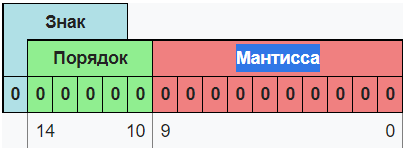

S -- Знаковый бит

E -- Порядок

M -- Мантисса

B -- Основание (10)

X = (-1)^S * B^E * M

64-битный float (double precision):

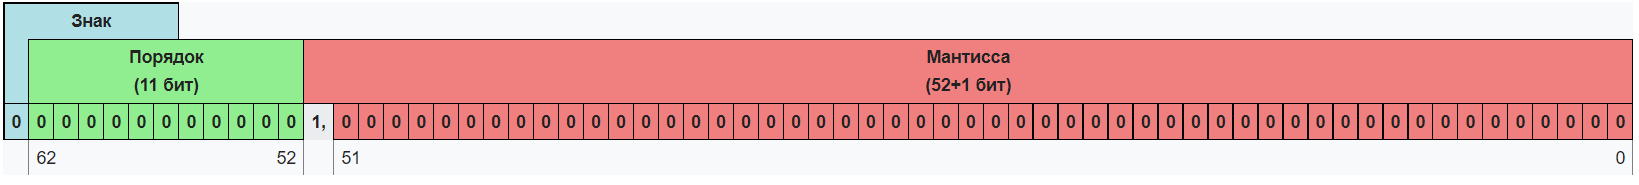

## 1. Коллекции: списки, кортежи, range, (строки), множества, словари и др. Понятие последовательности

### Строки

Строковые константы можно задавать и с помощью одинарных кавычек, и с помощью двойных, и с помощью тройных:

In [ ]:
s1 = 'ab"c'
s2 = "ab'c"
s3 = """abc
aaaaaa
aaaaa
a
aa
"""

s1 == s2 == s3

False

In [ ]:
print(s3)
print()
s3

abc
aaaaaa
aaaaa
a
aa




'abc\naaaaaa\naaaaa\na\naa\n'

In [ ]:
a = 'a\naaaa'
print(a)
a

a
aaaa


'a\naaaa'

In [ ]:
a[3]

'a'

**Внимание:** строки иммутабельны (неизменяемы)!

In [ ]:
a[1] = 'b'

TypeError: ignored

Функция `len` — получить длину строки (определена для всех коллекций):

In [ ]:
len("abc")

3

[1, 2, [1, 2, 3]]

У типа str большое количество встроенных строковых методов:
* .find — найти подстроку
* .upper — перевести строку в верхний регистр
* .lower — перевести строку в нижний регистр
* .strip — обрезать по краям поданные символы (по умолчанию пробельные)
* ...

https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str

Все они возвращают новый экземпляр строки!

In [ ]:
s3.replace('a', '10')

'10bc\n101010101010\n1010101010\n10\n1010\n'

In [ ]:
s1.find('b')

1

In [ ]:
s1[-1]

'c'

In [ ]:
sl = s1.upper()
sl

'AB"C'

In [ ]:
s1.upper().lower()

'ab"c'

In [ ]:
"a   ".strip()

'a'

In [ ]:
z = '      z.      '

In [ ]:
z.strip()

'z.'

In [ ]:
z.rstrip()

'      z.'

In [ ]:
z.lstrip()

'z.      '

Продвинутая индексация: Слайсы

In [ ]:
s = 'abcde'

In [ ]:
'b' + s[1:]

'bbcde'

In [ ]:
s[1:]

'bcde'

In [ ]:
s[1:-1]

'bcd'

In [ ]:
s_new = s[2:4]
print(s)
s_new

abcde


'cd'

s[start:finish:step]

* start — начало среза
* finish — конец среза (не входит в срез!!!)
* step — шаг

Индексы в питоне могут быть отрицательными! В таком случае считаем с конца (или двигаемся в обратном направлении, если это step)

In [ ]:
s = '0123456789'

In [ ]:
s[::2]

'02468'

In [ ]:
s[-1:1:-1]

'98765432'

In [ ]:
s[::-2]

'97531'

In [ ]:
s[::3]

'0369'

Срез равный всей строке:

In [ ]:
s[0:len(s):1]

'0123456789'

Cрез с шагом 2:

In [ ]:
s[0:len(s):2]

'02468'

Срез равный одному элементу:

In [ ]:
s[5:6:1]

'5'

Строки, как мы помним, можно складывать и умножать:

In [ ]:
s_new + s3

'cdabc\naaaaaa\naaaaa\na\naa\n'

In [ ]:
s_new * 5

'cdcdcdcdcd'

### Списки

In [ ]:
a = [1, 2, 3, 2, 0]

В список могут входить любые объекты:

In [ ]:
a = [1, '2', '3', [4, 5]]
a.append(1.2)
a

[1, '2', '3', [4, 5], 1.2]

Списки тоже поддерживают многие операции!

* cложение списков (+) — конкатенация списков
* умножение списка на целое число n (*) — повтороение списка n раз
* слайсы!

Всё это вместе называется концепцией последовательности. К "последовательным" типам относятся списки, кортежи (иммутабельные списки), range(), строки (в качестве символьных последовательностей)

Помимо упомянутых операций сложения, умножения, слайсов, измерения длины, поддерживаются операции in (not in), min, max, index (поиск), count

In [ ]:
b = [1, '2']
a + b

[1, '2', '3', [4, 5], 1.2, 1, '2']

In [ ]:
a * 2

[1, '2', '3', [4, 5], 1.2, 1, '2', '3', [4, 5], 1.2]

In [ ]:
a[::-1]

[1.2, [4, 5], '3', '2', 1]

In [ ]:
'2' in a + b

True

In [ ]:
2 not in a + b

True

In [ ]:
min(a) # работает не всегда!

TypeError: ignored

In [ ]:
max([10, 1000, 1, 2, 5000, 3])

5000

In [ ]:
min(['1', '2', '3', 'abc', "абв"])

'1'

In [ ]:
a.index([4, 5])
[4, 5] in a

True

In [ ]:
a.count(2)

0

Другие коллекции тоже поддерживают многое из этого!

**Внимание:** список — изменяемый объект! 

Можно менять элементы списка, можно добавлять новые элементы и удалять старые (`.append` и `.pop`).

In [ ]:
a[0] = '123'
a

['123', '2', '3', [4, 5], 1.2]

In [ ]:
a.append('data science')
a

['123', '2', '3', [4, 5], 1.2, 'data science']

### Преобразования списков и строк

Два основных строковых метода для взаимодействия списков и строк:

* .split — разделить строку на список строк по определённому сепаратору
* .join — соеденить список строк в одну большую строку по определённому сепаратору

In [ ]:
s = 'one,two,three'
s.split(',')

['one', 'two', 'three']

In [ ]:
", ".join(['arb', 'borb', 'kork'])

'arb, borb, kork'

### Другие коллекции

**Кортежи**: иммутабельные списки

In [ ]:
a = (1, )
a

(1,)

In [ ]:
a = (1, 2, 3)
a

(1, 2, 3)

In [ ]:
a[0] = 7

TypeError: ignored

In [ ]:
c = ('1', 2, 3)
c

('1', 2, 3)

**range**: итерируемый объект

In [ ]:
a = range(3, 17, 3)
a

range(3, 17, 3)

In [ ]:
for x in a:
  print(type(x))

<class 'int'>
<class 'int'>
<class 'int'>


**Множество**: коллекция без повторов

In [ ]:
a = {1, 2, 3, 3, 2, 4}
a
a.add('1')
a
a.add((1, 2, 3))
a

{(1, 2, 3), 1, '1', 2, 3, 4}

In [ ]:
b = frozenset('aabc')
b
b[2] = 

frozenset({'a', 'b', 'c'})

**Словари**: набор пар ключ-значение, индексируемый ключами (хеши)

In [ ]:
d = {1: 3, '1': 4, (1, 2, 3): 5, b: 10}
d

{(1, 2, 3): 5, 1: 3, '1': 4, frozenset({'a', 'b', 'c'}): 10}

In [ ]:
d[b]

10

In [ ]:
c = {a: 3}

TypeError: ignored

## 3. Итерируемся!

В анализе данных нужно много итерироваться по коллекциям!

In [ ]:
for i in a:
  print(i)

1
2
3
4


In [ ]:
for i, j in enumerate(a):
  print(i, j)
k, b, c = (1, 2, 3)
print(k, b, c)

0 1
1 2
2 3
3 4
1 2 3


In [ ]:
for k, v in d.items():
  print(k, v)

1 3
1 4
(1, 2, 3) 5
frozenset({'a', 'b', 'c'}) 10


In [ ]:
for k, v in sorted(d.items()):
  print(k, v)

TypeError: ignored

In [ ]:
a = [1, 2, 3, 4]
b = [1, 2, 3, 4, 5, 6]
for i in zip(a * 2, b):
  print(i)

(1, 1)
(2, 2)
(3, 3)
(4, 4)
(1, 5)
(2, 6)


In [ ]:
l = [1, 2, 3, 4, 5, 5]
for i in reversed(l):
  print(i)

5
5
4
3
2
1


In [ ]:
for i in sorted(set(reversed(l))):
  print(i)

1
2
3
4
5


## 4. Функции

In [ ]:
def plus(a, b):
  return a + b
print(plus)
plus

In [ ]:
locals()
globals()

**Замыкание:**

In [ ]:
def make_multiplier_of(n):
    def multiplier(x):
        return x * n
    return multiplier

In [ ]:
times3 = make_multiplier_of(3):
print(times3(10))

In [ ]:
times7 = make_multiplier_of(7)
print(times7(5))

**Декораторы:**

In [ ]:
import math

def cache(function):
    CACHE = {}
    def decorator(value):
        try: return CACHE[value]
        except:
            result = function(value)
            CACHE[value] = result
            return result
    return decorator

@cache
def is_prime(n):
    if n < 2: return False
    if n % 2 == 0: return n == 2
    limit = int(math.sqrt(n))
    for d in range(3, limit+1, 2):
        if n % d == 0: return False
    return True

print([n for n in range(20+1) if is_prime(n)])
print([n for n in range(20+1) if is_prime(n)])
print([n for n in range(20+1) if is_prime(n)])